In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import initializers

C:\Users\deep_learning\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'train'
validation_data_dir = 'val'
nb_train_samples = 3513
nb_validation_samples = 936
epochs = 50
batch_size = 16

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape,kernel_initializer=initializers.he_normal()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),kernel_initializer=initializers.he_normal()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),kernel_initializer=initializers.he_normal()))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,kernel_initializer=initializers.he_normal()))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1,kernel_initializer=initializers.glorot_normal()))
model.add(Activation('sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
     rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3513 images belonging to 2 classes.
Found 936 images belonging to 2 classes.


In [8]:
history=model.fit_generator(
     train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
219/219 [==============================] - 87s 395ms/step - loss: 0.4348 - acc: 0.8200 - val_loss: 0.2301 - val_acc: 0.9073
Epoch 2/50
219/219 [==============================] - 77s 351ms/step - loss: 0.2902 - acc: 0.8642 - val_loss: 0.1848 - val_acc: 0.9526
Epoch 3/50
219/219 [==============================] - 69s 316ms/step - loss: 0.2500 - acc: 0.8771 - val_loss: 0.1635 - val_acc: 0.9515
Epoch 4/50
219/219 [==============================] - 71s 324ms/step - loss: 0.2482 - acc: 0.9099 - val_loss: 0.1504 - val_acc: 0.9547
Epoch 5/50
219/219 [==============================] - 68s 313ms/step - loss: 0.2411 - acc: 0.9059 - val_loss: 0.1535 - val_acc: 0.9526
Epoch 6/50
219/219 [==============================] - 71s 325ms/step - loss: 0.2153 - acc: 0.9150 - val_loss: 0.1644 - val_acc: 0.9547
Epoch 7/50
219/219 [==============================] - 70s 321ms/step - loss: 0.2119 - acc: 0.9222 - val_loss: 0.1534 - val_acc: 0.9569
Epoch 8/50
219/219 [==============================] - 7

In [9]:
model.save_weights('simple_cnn.h5')

In [10]:
test_data_dir = 'test'

In [11]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [12]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1407 images belonging to 2 classes.


In [13]:
model.evaluate_generator(test_generator)

[0.3132712614220152, 0.945273631840796]

In [14]:
model.metrics_names

['loss', 'acc']

<IPython.core.display.Javascript object>


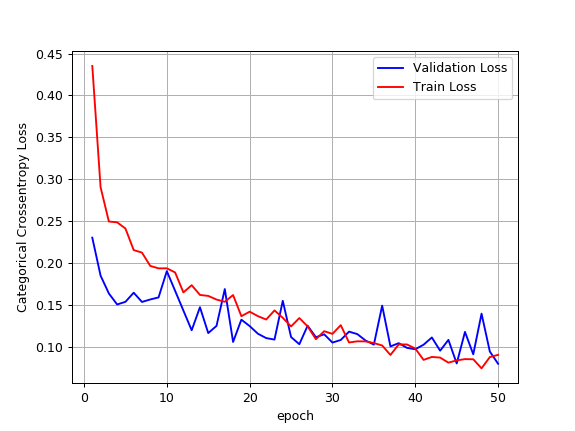

In [15]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### VGG 16

In [16]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D

In [17]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'train'
validation_data_dir = 'val'
nb_train_samples = 3513
nb_validation_samples = 936
epochs = 20
batch_size = 16


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [18]:
    #VGG_16(weights_path='imagenet')
model_1 = Sequential()
model_1.add(ZeroPadding2D((1,1),input_shape=input_shape))
model_1.add(Convolution2D(64, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(64, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(MaxPooling2D((2,2), strides=(2,2)))

model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(128, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(128, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(MaxPooling2D((2,2), strides=(2,2)))

model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(256, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(256, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(256, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(MaxPooling2D((2,2), strides=(2,2)))

model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(512, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(512, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(512, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(MaxPooling2D((2,2), strides=(2,2)))

model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(512, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(512, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(ZeroPadding2D((1,1)))
model_1.add(Convolution2D(512, 3, 3, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(MaxPooling2D((2,2), strides=(2,2)))

model_1.add(Flatten())
model_1.add(Dense(4096, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(Dropout(0.5))
model_1.add(Dense(4096, activation='relu',kernel_initializer=initializers.he_normal()))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='sigmoid',kernel_initializer=initializers.he_normal()))

model_1.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

C:\Users\deep_learning\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", kernel_initializer=<keras.ini...)`
  after removing the cwd from sys.path.
C:\Users\deep_learning\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", kernel_initializer=<keras.ini...)`
  
C:\Users\deep_learning\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", kernel_initializer=<keras.ini...)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\deep_learning\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", kernel_initializer=<keras.ini...)`
  if sys.path[0] == '':
C:\Users\deep_learning\Anaconda3\lib\si

In [19]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
     rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3513 images belonging to 2 classes.
Found 936 images belonging to 2 classes.


In [20]:
history_1 = model_1.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
219/219 [==============================] - 75s 341ms/step - loss: 3.4078 - acc: 0.7847 - val_loss: 5.4802 - val_acc: 0.6562
Epoch 2/20
219/219 [==============================] - 73s 332ms/step - loss: 3.4194 - acc: 0.7855 - val_loss: 5.4802 - val_acc: 0.6562
Epoch 3/20
219/219 [==============================] - 79s 361ms/step - loss: 3.4527 - acc: 0.7834 - val_loss: 5.4802 - val_acc: 0.6562
Epoch 4/20
219/219 [==============================] - 74s 336ms/step - loss: 3.4113 - acc: 0.7860 - val_loss: 5.4802 - val_acc: 0.6562
Epoch 5/20
219/219 [==============================] - 73s 335ms/step - loss: 3.4113 - acc: 0.7860 - val_loss: 5.4802 - val_acc: 0.6562
Epoch 6/20
219/219 [==============================] - 73s 332ms/step - loss: 3.4250 - acc: 0.7852 - val_loss: 5.4802 - val_acc: 0.6562
Epoch 7/20
219/219 [==============================] - 78s 358ms/step - loss: 3.4244 - acc: 0.7852 - val_loss: 5.4802 - val_acc: 0.6562
Epoch 8/20
219/219 [==============================] - 7

In [21]:
model_1.evaluate_generator(test_generator)

[5.72203597737782, 0.6410803129762813]

In [22]:
model.metrics_names

['loss', 'acc']

<IPython.core.display.Javascript object>


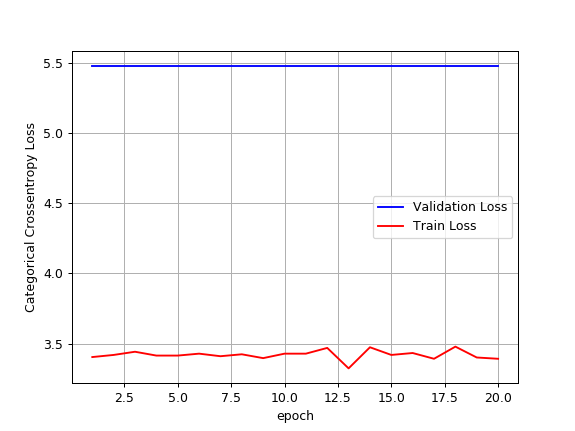

In [23]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history_1.history['val_loss']
ty = history_1.history['loss']
plt_dynamic(x, vy, ty, ax)

### Bottleneck VGG

In [ ]:
# can you check this code and use it for ars?..ohkkk check this blog

In [54]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [55]:
from keras import applications

In [ ]:
train_data_dir=

In [26]:
 datagen = ImageDataGenerator(rescale=1. / 255)  

In [27]:
 generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  

Found 3513 images belonging to 2 classes.


In [28]:
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)

In [29]:
import math

In [30]:
predict_size_train = int(math.ceil(nb_train_samples / batch_size))

In [31]:
model_vgg = applications.VGG16(include_top=False, weights='imagenet') 

In [32]:
 bottleneck_features_train = model_vgg.predict_generator(generator, predict_size_train,verbose = 1)  

220/220 [==============================] - 43s 196ms/step


In [33]:
np.save('bottleneck_features_train.npy', bottleneck_features_train) 

In [34]:
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = model_vgg.predict_generator(  
     generator, predict_size_validation,verbose = 1)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 

Found 936 images belonging to 2 classes.
59/59 [==============================] - 13s 223ms/step


In [35]:
datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False) 

Found 3513 images belonging to 2 classes.


In [36]:
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)

In [37]:
train_data = np.load('bottleneck_features_train.npy')  

In [38]:
train_labels = generator_top.classes 

In [39]:
train_data.shape,train_labels.shape

((3513, 4, 4, 512), (3513,))

In [40]:
from keras.utils.np_utils import to_categorical  

In [41]:
train_labels = to_categorical(train_labels, num_classes=num_classes)  

In [42]:
generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   
validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes) 

Found 936 images belonging to 2 classes.


In [43]:
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='sigmoid'))

In [44]:
model.compile(optimizer='adam',  
              loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(train_data, train_labels,  
          epochs=50,  
          batch_size=batch_size,  
          validation_data=(validation_data, validation_labels))  

Train on 3513 samples, validate on 936 samples
Epoch 1/50
3513/3513 [==============================] - 2s 659us/step - loss: 0.2962 - acc: 0.7817 - val_loss: 0.3065 - val_acc: 0.6538
Epoch 2/50
3513/3513 [==============================] - 2s 502us/step - loss: 0.2085 - acc: 0.7911 - val_loss: 0.2822 - val_acc: 0.6538
Epoch 3/50
3513/3513 [==============================] - 2s 569us/step - loss: 0.2024 - acc: 0.8087 - val_loss: 0.3142 - val_acc: 0.6667
Epoch 4/50
3513/3513 [==============================] - 2s 532us/step - loss: 0.1878 - acc: 0.8981 - val_loss: 0.1423 - val_acc: 0.9444
Epoch 5/50
3513/3513 [==============================] - 2s 518us/step - loss: 0.1193 - acc: 0.9533 - val_loss: 0.1249 - val_acc: 0.9541
Epoch 6/50
3513/3513 [==============================] - 2s 530us/step - loss: 0.0897 - acc: 0.9658 - val_loss: 0.0852 - val_acc: 0.9626
Epoch 7/50
3513/3513 [==============================] - 2s 535us/step - loss: 0.0826 - acc: 0.9690 - val_loss: 0.0664 - val_acc: 0.9733
E

In [46]:
model.save_weights('bottleneck_fc_model.h5') 

<IPython.core.display.Javascript object>


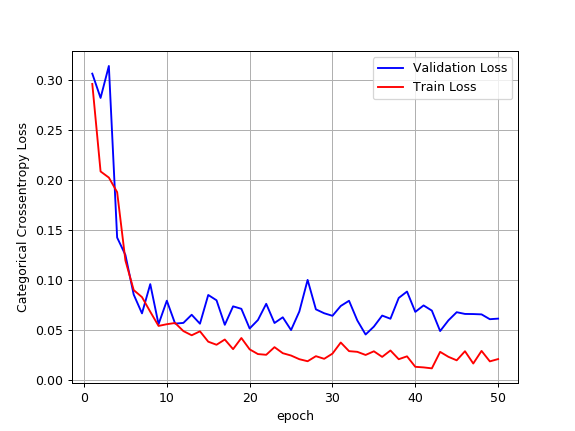

In [47]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,50+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [48]:
test_data_dir='test'

In [49]:
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = model_vgg.predict_generator(  
     generator, predict_size_test,verbose = 1)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 

Found 1407 images belonging to 2 classes.
88/88 [==============================] - 21s 239ms/step


In [50]:
generator_top = datagen_top.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  

test_data = np.load('bottleneck_features_test.npy')  
   
test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 

Found 1407 images belonging to 2 classes.


In [51]:
test_data.shape

(1407, 4, 4, 512)

In [52]:
test_labels.shape

(1407, 2)

In [53]:
(eval_loss, eval_accuracy) = model.evaluate(  
     test_data, test_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  


1407/1407 [==============================] - 0s 181us/step
[INFO] accuracy: 89.98%
[INFO] Loss: 0.7691533414029457


# We want to print the Precision_Recall values.. Please don't close it..